PROJECT - DATA VISUALIZATION

Name - Priyanka Maru

Student Id - 202091536


BROAD GOAL - How can the company be improved?

SUB GOAL 1 - Promoting the jobs which are more profitable.

SUB GOAL 2 - Improvement of the customer satisfaction.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output

In [2]:
df_cal = pd.read_csv('calendar.csv')
df_emp = pd.read_csv('employees.csv')
df_landscape = pd.read_csv('landscaping.csv')

LOAD THE DATA

In [3]:
df_landscape['request_date']=pd.to_datetime(df_landscape['request_date'], errors='coerce')
df_landscape['start_date'] = pd.to_datetime(df_landscape['start_date'], errors='coerce')
df_landscape['completion_date'] = pd.to_datetime(df_landscape['completion_date'], errors='coerce')

df_landscape['completion_days'] = ((df_landscape.completion_date - df_landscape.start_date)/np.timedelta64(1, 'D')) + 1
df_landscape

,job_id,job_type,invoice_amount,material_costs,request_date,start_date,completion_date,customer_id,customer_type,customer_postal_code,customer_satisfaction,completion_days
0,j_185274,basic_lawncare,240.0,76,2022-03-01,2022-04-01,2022-04-02,c_3ac965,residential,A1H,2,2.0
1,j_8bd7f7,basic_lawncare,276.0,68,2022-03-01,2022-04-26,2022-04-26,c_3ac965,residential,A1H,7,1.0
2,j_422932,basic_lawncare,276.0,72,2022-03-01,2022-04-26,2022-04-26,c_3ac965,residential,A1H,8,1.0
3,j_894d5,basic_lawncare,276.0,73,2022-03-01,2022-05-17,2022-05-17,c_3ac965,residential,A1H,2,1.0
4,j_5521d6,basic_lawncare,276.0,71,2022-03-01,2022-05-17,2022-05-17,c_3ac965,residential,A1H,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,j_3fabc2,tree_pruning,540.0,124,2022-08-26,2022-09-28,2022-09-28,c_6686bb,commercial,A1S,8,1.0
1272,j_7dbbb6,garden_landscaping,930.0,361,2022-08-26,2022-09-28,2022-10-01,c_34996b,residential,A1E,9,4.0
1273,j_239a4a,water_feature,3750.0,1514,2022-09-14,2022-10-09,2022-10-10,c_97ef33,residential,A1E,1,2.0
1274,j_500f01,basic_lawncare,260.0,75,2022-10-31,2022-10-31,2022-10-31,c_97ef33,residential,A1E,6,1.0


# VISUALIZATION 1 - Understanding Customer Satisfaction per Job Type 

In [4]:
df_landscape_2=df_landscape.sort_values(by="customer_satisfaction",ascending=False)
df_landscape_2=df_landscape_2.groupby(['job_type']).mean().reset_index().sort_values(by="customer_satisfaction", ascending=True)
df_landscape_2

,job_type,invoice_amount,material_costs,customer_satisfaction,completion_days
7,retaining_wall,2172.400000,1228.420000,3.640000,3.260000
10,water_feature,4260.652174,2082.369565,3.739130,5.086957
8,spring_cleanup,490.481928,124.686747,5.759036,2.048193
1,complete_lawncare,701.809375,227.706250,6.618750,1.487500
9,tree_pruning,348.791946,89.348993,6.778523,1.624161
5,install_new_lawn,1607.010309,1005.783505,6.876289,1.742268
0,basic_lawncare,372.797965,94.555233,6.877907,1.488372
4,garden_landscaping,1388.090909,490.045455,6.963636,3.072727
2,fall_planting,688.000000,251.350000,7.000000,2.150000
6,lawn_treatment,582.380952,217.253968,7.158730,2.222222


<ipython-input-5-9796dd1991ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


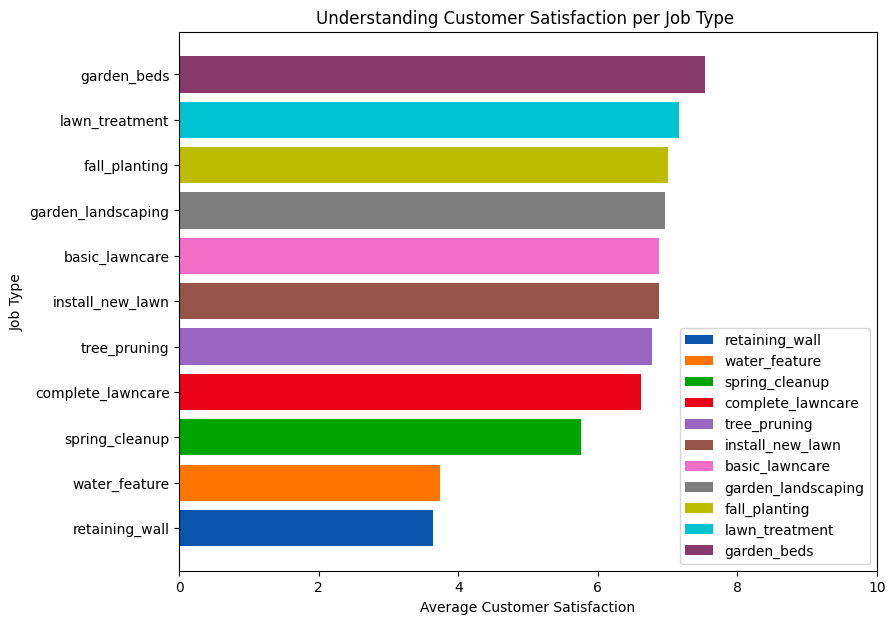

In [5]:
fig, ax = plt.subplots(figsize=(9,7))

ax.barh(df_landscape_2['job_type'],df_landscape_2['customer_satisfaction'],label=df_landscape_2['job_type'],color=['#0a54ad','#FF7500','#00A400','#EA0017','#9B65C2','#965348','#F36EC6','#7F7E7F','#BCBC00','#00C3D2','#87396c'])
ax.set_xticks([0,2,4,6,8,10])
ax.set_xticklabels(['0','2','4','6','8','10'])
y_ticks=df_landscape_2['job_type']
ax.set_yticklabels(y_ticks)
ax.set_ylabel('Job Type')
ax.set_xlabel('Average Customer Satisfaction')
ax.legend()
ax.set_title('Understanding Customer Satisfaction per Job Type ')
plt.show()



In [6]:
df_landscape_5 = df_landscape[['job_id','job_type','invoice_amount','material_costs','request_date','start_date','completion_date','customer_type','customer_satisfaction','completion_days']]

df_landscape_5['days_req_to_start']= ((df_landscape.start_date - df_landscape.request_date)/np.timedelta64(1, 'D')) + 1
df_landscape_5['difference'] = df_landscape_5['invoice_amount'] - df_landscape_5['material_costs']

df_landscape_5

<ipython-input-6-21bae264d800>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landscape_5['days_req_to_start']= ((df_landscape.start_date - df_landscape.request_date)/np.timedelta64(1, 'D')) + 1


,job_id,job_type,invoice_amount,material_costs,request_date,start_date,completion_date,customer_type,customer_satisfaction,completion_days,days_req_to_start,difference
0,j_185274,basic_lawncare,240.0,76,2022-03-01,2022-04-01,2022-04-02,residential,2,2.0,32.0,164.0
1,j_8bd7f7,basic_lawncare,276.0,68,2022-03-01,2022-04-26,2022-04-26,residential,7,1.0,57.0,208.0
2,j_422932,basic_lawncare,276.0,72,2022-03-01,2022-04-26,2022-04-26,residential,8,1.0,57.0,204.0
3,j_894d5,basic_lawncare,276.0,73,2022-03-01,2022-05-17,2022-05-17,residential,2,1.0,78.0,203.0
4,j_5521d6,basic_lawncare,276.0,71,2022-03-01,2022-05-17,2022-05-17,residential,9,1.0,78.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,j_3fabc2,tree_pruning,540.0,124,2022-08-26,2022-09-28,2022-09-28,commercial,8,1.0,34.0,416.0
1272,j_7dbbb6,garden_landscaping,930.0,361,2022-08-26,2022-09-28,2022-10-01,residential,9,4.0,34.0,569.0
1273,j_239a4a,water_feature,3750.0,1514,2022-09-14,2022-10-09,2022-10-10,residential,1,2.0,26.0,2236.0
1274,j_500f01,basic_lawncare,260.0,75,2022-10-31,2022-10-31,2022-10-31,residential,6,1.0,1.0,185.0


In [7]:
df_cal['day_of_year']=pd.to_datetime(df_cal['date']).dt.day_of_year

In [8]:
df_cal=df_cal.fillna('0')

In [9]:
df_landscape_5['start_day_of_year']= pd.to_datetime(df_landscape_5['start_date']).dt.dayofyear
df_landscape_5['completion_day_of_year']=pd.to_datetime(df_landscape_5['completion_date']).dt.dayofyear
df_landscape_5

,job_id,job_type,invoice_amount,material_costs,request_date,start_date,completion_date,customer_type,customer_satisfaction,completion_days,days_req_to_start,difference,start_day_of_year,completion_day_of_year
0,j_185274,basic_lawncare,240.0,76,2022-03-01,2022-04-01,2022-04-02,residential,2,2.0,32.0,164.0,91,92
1,j_8bd7f7,basic_lawncare,276.0,68,2022-03-01,2022-04-26,2022-04-26,residential,7,1.0,57.0,208.0,116,116
2,j_422932,basic_lawncare,276.0,72,2022-03-01,2022-04-26,2022-04-26,residential,8,1.0,57.0,204.0,116,116
3,j_894d5,basic_lawncare,276.0,73,2022-03-01,2022-05-17,2022-05-17,residential,2,1.0,78.0,203.0,137,137
4,j_5521d6,basic_lawncare,276.0,71,2022-03-01,2022-05-17,2022-05-17,residential,9,1.0,78.0,205.0,137,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,j_3fabc2,tree_pruning,540.0,124,2022-08-26,2022-09-28,2022-09-28,commercial,8,1.0,34.0,416.0,271,271
1272,j_7dbbb6,garden_landscaping,930.0,361,2022-08-26,2022-09-28,2022-10-01,residential,9,4.0,34.0,569.0,271,274
1273,j_239a4a,water_feature,3750.0,1514,2022-09-14,2022-10-09,2022-10-10,residential,1,2.0,26.0,2236.0,282,283
1274,j_500f01,basic_lawncare,260.0,75,2022-10-31,2022-10-31,2022-10-31,residential,6,1.0,1.0,185.0,304,304


Calculating the wage of employee per job

In [10]:
for job in df_landscape_5['job_id']:
  emplopyees_worked_list=[]
  df_jobspecific=df_landscape_5[df_landscape_5['job_id']==job]
  start_day=df_jobspecific['start_day_of_year'].item()
  end_day=df_jobspecific['completion_day_of_year'].item()
  df_cal['day_of_year'].astype(int).dtypes

  df_cal2=df_cal[(df_cal.day_of_year>=start_day)& (df_cal.day_of_year<=end_day)]

  emp_dict=()
  employee_list=df_emp['employee_id']

  for employee in employee_list:
    df_cal2=df_cal2.reset_index(drop=True)
    for i in range(len(df_cal2[employee])):
      if job in df_cal2[employee].iloc[i]:
        df_cal_specific=df_cal2[employee].astype(str)
        emplopyees_worked_list.append(employee)
      else:
        continue
 
  labour_cost=0;
  for emp in emplopyees_worked_list:
    emp_wage=df_emp[df_emp.employee_id==emp]
    wage=emp_wage['hourly_wage'].item()
    labour_cost+=(wage*4)

  df_landscape_5.loc[df_landscape_5["job_id"]==job, "labour_cost"] = labour_cost


# df_landscape_5.to_csv("cotFile.csv")
  
df_landscape_5

,job_id,job_type,invoice_amount,material_costs,request_date,start_date,completion_date,customer_type,customer_satisfaction,completion_days,days_req_to_start,difference,start_day_of_year,completion_day_of_year,labour_cost
0,j_185274,basic_lawncare,240.0,76,2022-03-01,2022-04-01,2022-04-02,residential,2,2.0,32.0,164.0,91,92,144.0
1,j_8bd7f7,basic_lawncare,276.0,68,2022-03-01,2022-04-26,2022-04-26,residential,7,1.0,57.0,208.0,116,116,72.0
2,j_422932,basic_lawncare,276.0,72,2022-03-01,2022-04-26,2022-04-26,residential,8,1.0,57.0,204.0,116,116,82.0
3,j_894d5,basic_lawncare,276.0,73,2022-03-01,2022-05-17,2022-05-17,residential,2,1.0,78.0,203.0,137,137,72.0
4,j_5521d6,basic_lawncare,276.0,71,2022-03-01,2022-05-17,2022-05-17,residential,9,1.0,78.0,205.0,137,137,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,j_3fabc2,tree_pruning,540.0,124,2022-08-26,2022-09-28,2022-09-28,commercial,8,1.0,34.0,416.0,271,271,96.0
1272,j_7dbbb6,garden_landscaping,930.0,361,2022-08-26,2022-09-28,2022-10-01,residential,9,4.0,34.0,569.0,271,274,576.0
1273,j_239a4a,water_feature,3750.0,1514,2022-09-14,2022-10-09,2022-10-10,residential,1,2.0,26.0,2236.0,282,283,432.0
1274,j_500f01,basic_lawncare,260.0,75,2022-10-31,2022-10-31,2022-10-31,residential,6,1.0,1.0,185.0,304,304,88.0


In [11]:
df_landscape_6=df_landscape_5[['job_type','customer_satisfaction','invoice_amount','completion_days','material_costs','days_req_to_start','difference','labour_cost']]
df_landscape_6

,job_type,customer_satisfaction,invoice_amount,completion_days,material_costs,days_req_to_start,difference,labour_cost
0,basic_lawncare,2,240.0,2.0,76,32.0,164.0,144.0
1,basic_lawncare,7,276.0,1.0,68,57.0,208.0,72.0
2,basic_lawncare,8,276.0,1.0,72,57.0,204.0,82.0
3,basic_lawncare,2,276.0,1.0,73,78.0,203.0,72.0
4,basic_lawncare,9,276.0,1.0,71,78.0,205.0,88.0
...,...,...,...,...,...,...,...,...
1271,tree_pruning,8,540.0,1.0,124,34.0,416.0,96.0
1272,garden_landscaping,9,930.0,4.0,361,34.0,569.0,576.0
1273,water_feature,1,3750.0,2.0,1514,26.0,2236.0,432.0
1274,basic_lawncare,6,260.0,1.0,75,1.0,185.0,88.0


In [12]:
df_landscape_6=df_landscape_6.corr()
df_landscape_6

,customer_satisfaction,invoice_amount,completion_days,material_costs,days_req_to_start,difference,labour_cost
customer_satisfaction,1.000000,-0.173281,-0.198910,-0.197394,0.191633,-0.132863,-0.189269
invoice_amount,-0.173281,1.000000,0.679991,0.967614,-0.147143,0.959102,0.865699
completion_days,-0.198910,0.679991,1.000000,0.626816,-0.202372,0.687114,0.874002
material_costs,-0.197394,0.967614,0.626816,1.000000,-0.173525,0.856587,0.815763
days_req_to_start,0.191633,-0.147143,-0.202372,-0.173525,1.000000,-0.106198,-0.158832
difference,-0.132863,0.959102,0.687114,0.856587,-0.106198,1.000000,0.854850
labour_cost,-0.189269,0.865699,0.874002,0.815763,-0.158832,0.854850,1.000000


# VISUALIZATION 2 - Correlation between various parameters

Text(0.5, 1.0, 'Correlation between various parameters to check the dependency with customer satisfaction')

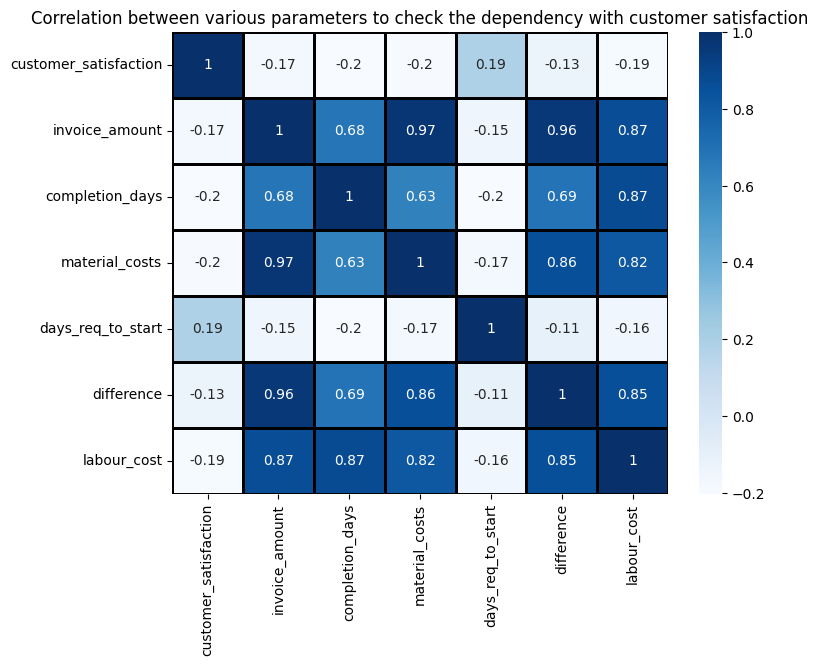

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df_landscape_6,cmap="Blues",annot=True,linewidths=2, linecolor='black')
sns.set_style('whitegrid')
plt.title('Correlation between various parameters to check the dependency with customer satisfaction')

In [14]:
df_landscape_7=df_landscape_5[['job_type','customer_type','customer_satisfaction','completion_days','days_req_to_start']].sort_values(by="job_type",ascending=False)
df_landscape_7

,job_type,customer_type,customer_satisfaction,completion_days,days_req_to_start
932,water_feature,residential,3,6.0,21.0
609,water_feature,commercial,9,7.0,33.0
73,water_feature,residential,5,5.0,34.0
437,water_feature,commercial,1,4.0,10.0
714,water_feature,residential,1,6.0,25.0
...,...,...,...,...,...
924,basic_lawncare,residential,8,2.0,32.0
352,basic_lawncare,commercial,5,1.0,1.0
355,basic_lawncare,commercial,7,1.0,7.0
366,basic_lawncare,commercial,10,2.0,31.0


In [15]:
df_landscape_7 = df_landscape_7.groupby(['job_type','customer_satisfaction']).mean().reset_index()
df_land_bl = df_landscape_7[df_landscape_7.job_type == "basic_lawncare"]
df_land_cl = df_landscape_7[df_landscape_7.job_type == "complete_lawncare"]
df_land_fp = df_landscape_7[df_landscape_7.job_type == "fall_planting"]
df_land_wf = df_landscape_7[df_landscape_7.job_type == "water_feature"]
df_land_rw = df_landscape_7[df_landscape_7.job_type == "retaining_wall"]
df_land_gb = df_landscape_7[df_landscape_7.job_type == "garden_beds"]
df_land_gl = df_landscape_7[df_landscape_7.job_type == "garden_landscaping"]
df_land_il = df_landscape_7[df_landscape_7.job_type == "install_new_lawn"]
df_land_lt = df_landscape_7[df_landscape_7.job_type == "lawn_treatment"]
df_land_sc = df_landscape_7[df_landscape_7.job_type == "spring_cleanup"]
df_land_tp = df_landscape_7[df_landscape_7.job_type == "tree_pruning"]

VISUALIZATION 3 - Respone time Vs Customer satisfaction

In [16]:
sns.set_style('darkgrid')

Dropdown(description='Job Type:\t', options=(('Basic Lawncare', 1), ('Compelete Lawncare', 2), ('Fall planting…

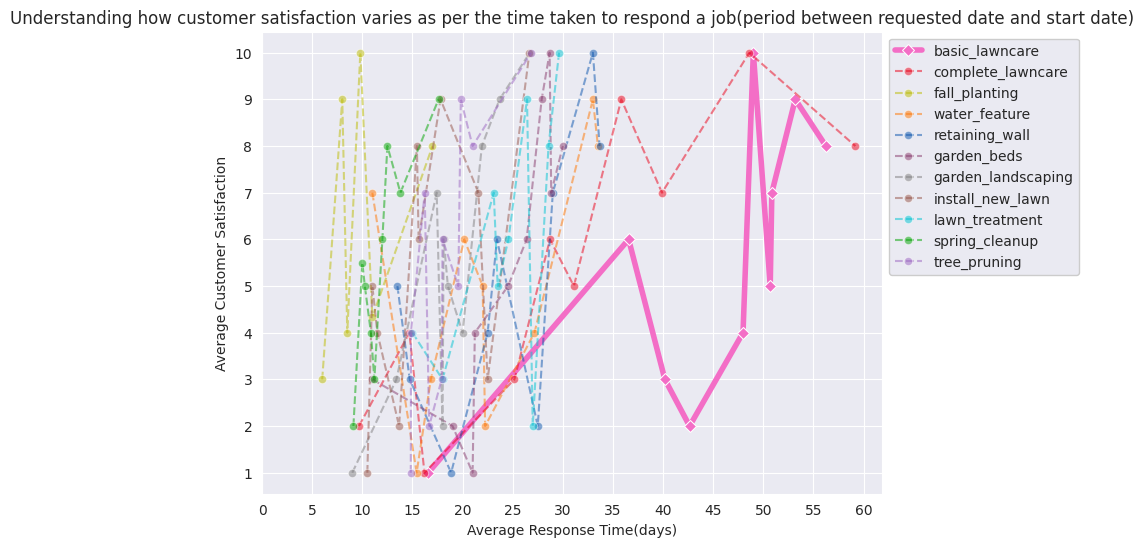

In [17]:
# Create the dropdown widget
dropdown = dropdown = widgets.Dropdown(
    options=[('Basic Lawncare', 1), ('Compelete Lawncare', 2), ('Fall planting', 3),('Water Feature',4),('Retaining Wall',5),('Garden Beds',6),
             ('Garden landscaping',7),('Install new lawn',8),('lawn treatment',9),('Spring Cleanup',10),('Tree Pruning',11)],
    description='Job Type:\t',
)

# Display the dropdown widget
display(dropdown)


job_type_list = list(['basic_lawncare',"complete_lawncare","fall_planting","water_feature","retaining_wall","garden_beds","garden_landscaping","install_new_lawn","lawn_treatment","spring_cleanup","tree_pruning"])
job_type_color = {'retaining_wall':'#0a54ad',
                  'water_feature':'#FF7500',
                  'spring_cleanup':'#00A400',
                  'complete_lawncare':'#EA0017',
                  'tree_pruning':'#9B65C2',
                  'install_new_lawn':'#965348',
                  'basic_lawncare':'#F36EC6',
                  'garden_landscaping':'#7F7E7F',
                  'fall_planting':'#BCBC00',
                  'lawn_treatment':'#00C3D2',
                  'garden_beds':'#87396c'
                  }

               

def default_graph():
  fig, ax1 = plt.subplots(figsize=(8,6))
  sns.set_style('darkgrid')   
  sns.lineplot(data=df_land_bl,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='D',color="#F36EC6",alpha=1,linewidth=4)
  sns.lineplot(data=df_land_cl,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#EA0017",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_fp,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#BCBC00",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_wf,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#FF7500",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_rw,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#0a54ad",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_gb,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#87396c",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_gl,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#7F7E7F",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_il,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#965348",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_lt,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#00C3D2",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_sc,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#00A400",alpha=0.5,linestyle="--")
  sns.lineplot(data=df_land_tp,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color="#9B65C2",alpha=0.5,linestyle="--")
 
  ax1.legend(loc="upper left",bbox_to_anchor=(1,1),framealpha=1, frameon=True, labels=['basic_lawncare','complete_lawncare','fall_planting','water_feature','retaining_wall','garden_beds','garden_landscaping','install_new_lawn','lawn_treatment','spring_cleanup','tree_pruning'])
  ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
  ax1.set_xticklabels(['0','5','10','15','20','25','30','35','40','45','50','55','60'])
  ax1.set_yticks([1,2,3,4,5,6,7,8,9,10])
  ax1.set_yticklabels(['1','2','3','4','5','6','7','8','9','10'])
  ax1.set_xlabel('Average Response Time(days)')
  ax1.set_ylabel('Average Customer Satisfaction')
  ax1.set_title('Understanding how customer satisfaction varies as per the time taken to respond a job(period between requested date and start date)')
  plt.show()

default_graph()

def dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(dropdown)
        sns.set_style('darkgrid') 
        if change['new'] == 1 :
          df_land_bl = df_landscape_7[df_landscape_7.job_type == "basic_lawncare"]
          plotting_selected(df_land_bl,"#F36EC6","basic_lawncare")
        elif change['new'] == 2 :
          df_land_cl = df_landscape_7[df_landscape_7.job_type == "complete_lawncare"]
          plotting_selected(df_land_cl,"#EA0017","complete_lawncare")
        elif change['new'] == 3 :
          df_land_fp = df_landscape_7[df_landscape_7.job_type == "fall_planting"]
          plotting_selected(df_land_fp,"#BCBC00","fall_planting")
        elif change['new'] == 4 :
          df_land_wf = df_landscape_7[df_landscape_7.job_type == "water_feature"]
          plotting_selected(df_land_wf,"#FF7500","water_feature")
        elif change['new'] == 5 :
          df_land_rw = df_landscape_7[df_landscape_7.job_type == "retaining_wall"]
          plotting_selected(df_land_rw,"#0a54ad","retaining_wall")
        elif change['new'] == 6 :
          df_land_gb = df_landscape_7[df_landscape_7.job_type == "garden_beds"]
          plotting_selected(df_land_gb,"#87396c","garden_beds")
        elif change['new'] == 7 :
          df_land_gl = df_landscape_7[df_landscape_7.job_type == "garden_landscaping"]
          plotting_selected(df_land_gl,"#7F7E7F","garden_landscaping")
        elif change['new'] == 8 :
          df_land_il = df_landscape_7[df_landscape_7.job_type == "install_new_lawn"]
          plotting_selected(df_land_il,"#965348","install_new_lawn")
        elif change['new'] == 9 :
          df_land_lt = df_landscape_7[df_landscape_7.job_type == "lawn_treatment"]
          plotting_selected(df_land_lt,"#00C3D2","lawn_treatment")
        elif change['new'] == 10 :
          df_land_sc = df_landscape_7[df_landscape_7.job_type == "spring_cleanup"]
          plotting_selected(df_land_sc,"#00A400","spring_cleanup")
        elif change['new'] == 11 :
          df_land_tp = df_landscape_7[df_landscape_7.job_type == "tree_pruning"]
          plotting_selected(df_land_tp,"#9B65C2","tree_pruning")
        else :
            print("No such job type exists")


def plotting_selected(df,colr,job_type):
  fig, ax1 = plt.subplots(figsize=(8,6))
  sns.set_style('darkgrid')
  for jobs in job_type_list:
    if job_type != jobs:
      # print("jobs...",job_type)
      # print("job colors...",job_type_color[jobs])
      df_land = df_landscape_7[df_landscape_7.job_type == jobs]
      sns.lineplot(data=df_land,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='o',color=job_type_color[jobs],alpha=0.5,linestyle="--",label=jobs)

  sns.lineplot(data=df,x="days_req_to_start",y="customer_satisfaction",errorbar=None,marker='D',color=job_type_color[job_type],alpha=1,linewidth=4,label=job_type)
  ax1.legend(loc="upper left",bbox_to_anchor=(1,1),framealpha=1, frameon=True)
  ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
  ax1.set_xticklabels(['0','5','10','15','20','25','30','35','40','45','50','55','60'])
  ax1.set_yticks([1,2,3,4,5,6,7,8,9,10])
  ax1.set_yticklabels(['1','2','3','4','5','6','7','8','9','10'])
  ax1.set_xlabel('Average Response Time(days)')
  ax1.set_ylabel('Average Customer Satisfaction')
  ax1.set_title('Understanding how customer satisfaction varies as per the time taken to respond a job(period between requested date and start date)')
  plt.show()
  
dropdown.observe(dropdown_change)

In [18]:
df_landscape_5['Profit'] = df_landscape_5['invoice_amount'] - df_landscape_5['material_costs'] - df_landscape_5['labour_cost']
df_landscape_5

,job_id,job_type,invoice_amount,material_costs,request_date,start_date,completion_date,customer_type,customer_satisfaction,completion_days,days_req_to_start,difference,start_day_of_year,completion_day_of_year,labour_cost,Profit
0,j_185274,basic_lawncare,240.0,76,2022-03-01,2022-04-01,2022-04-02,residential,2,2.0,32.0,164.0,91,92,144.0,20.0
1,j_8bd7f7,basic_lawncare,276.0,68,2022-03-01,2022-04-26,2022-04-26,residential,7,1.0,57.0,208.0,116,116,72.0,136.0
2,j_422932,basic_lawncare,276.0,72,2022-03-01,2022-04-26,2022-04-26,residential,8,1.0,57.0,204.0,116,116,82.0,122.0
3,j_894d5,basic_lawncare,276.0,73,2022-03-01,2022-05-17,2022-05-17,residential,2,1.0,78.0,203.0,137,137,72.0,131.0
4,j_5521d6,basic_lawncare,276.0,71,2022-03-01,2022-05-17,2022-05-17,residential,9,1.0,78.0,205.0,137,137,88.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,j_3fabc2,tree_pruning,540.0,124,2022-08-26,2022-09-28,2022-09-28,commercial,8,1.0,34.0,416.0,271,271,96.0,320.0
1272,j_7dbbb6,garden_landscaping,930.0,361,2022-08-26,2022-09-28,2022-10-01,residential,9,4.0,34.0,569.0,271,274,576.0,-7.0
1273,j_239a4a,water_feature,3750.0,1514,2022-09-14,2022-10-09,2022-10-10,residential,1,2.0,26.0,2236.0,282,283,432.0,1804.0
1274,j_500f01,basic_lawncare,260.0,75,2022-10-31,2022-10-31,2022-10-31,residential,6,1.0,1.0,185.0,304,304,88.0,97.0


In [19]:
df_land_bl = df_landscape_5[df_landscape_5.job_type == "basic_lawncare"]
df_land_cl = df_landscape_5[df_landscape_5.job_type == "complete_lawncare"]
df_land_fp = df_landscape_5[df_landscape_5.job_type == "fall_planting"]
df_land_wf = df_landscape_5[df_landscape_5.job_type == "water_feature"]
df_land_rw = df_landscape_5[df_landscape_5.job_type == "retaining_wall"]
df_land_gb = df_landscape_5[df_landscape_5.job_type == "garden_beds"]
df_land_gl = df_landscape_5[df_landscape_5.job_type == "garden_landscaping"]
df_land_il = df_landscape_5[df_landscape_5.job_type == "install_new_lawn"]
df_land_lt = df_landscape_5[df_landscape_5.job_type == "lawn_treatment"]
df_land_sc = df_landscape_5[df_landscape_5.job_type == "spring_cleanup"]
df_land_tp = df_landscape_5[df_landscape_5.job_type == "tree_pruning"]

In [20]:
df_landscape_5_bar = df_landscape_5.groupby(['job_type','customer_type']).sum().reset_index()
df_landscape_5_bar

,job_type,customer_type,invoice_amount,material_costs,customer_satisfaction,completion_days,days_req_to_start,difference,start_day_of_year,completion_day_of_year,labour_cost,Profit
0,basic_lawncare,commercial,48088.5,11564,764,166.0,6322.0,36524.5,20729,20780,12708.0,23816.5
1,basic_lawncare,residential,80154.0,20963,1602,346.0,10141.0,59191.0,43838,43955,26956.0,32235.0
2,complete_lawncare,commercial,51157.5,15769,448,100.0,2891.0,35388.5,12353,12388,14758.0,20630.5
3,complete_lawncare,residential,61132.0,20664,611,138.0,2960.0,40468.0,19557,19600,20370.0,20098.0
4,fall_planting,commercial,5990.0,2032,53,14.0,58.0,3958.0,2050,2057,1144.0,2814.0
5,fall_planting,residential,7770.0,2995,87,29.0,161.0,4775.0,3759,3775,2250.0,2525.0
6,garden_beds,commercial,41240.0,13217,417,115.0,1524.0,28023.0,12594,12655,9062.0,18961.0
7,garden_beds,residential,56820.0,20375,743,202.0,2648.0,36445.0,22162,22264,15496.0,20949.0
8,garden_landscaping,commercial,44760.0,14958,177,84.0,557.0,29802.0,5337,5393,12508.0,17294.0
9,garden_landscaping,residential,107930.0,38947,589,254.0,1755.0,68983.0,16561,16733,38190.0,30793.0


#VISUALIZATION 4 - Profit per Job Type for both the type of customers

In [21]:
sns.set_style('ticks')

In [22]:
div = widgets.HTML(
    value='<div style="color: white; font-size: 15px;">Choose the Customer Type:</div>'
)
display(div)
checkbox1 = widgets.Checkbox(description='Commercial')
checkbox2 = widgets.Checkbox(description='Residential')

def get_checkbox_values(checkbox1_value, checkbox2_value):
        clear_output(wait=True)
        sns.set_style('ticks')
        if (checkbox1_value==True) & (checkbox2_value==False):
            df_new = df_landscape_5_bar.loc[df_landscape_5_bar.customer_type == 'commercial']
            df_new = df_new.sort_values(by='Profit',ascending=False)
            clear_output(wait=True)
            plotting(df_new)
        elif (checkbox2_value==True) & (checkbox1_value==False):
             df_new = df_landscape_5_bar.loc[df_landscape_5_bar.customer_type == 'residential']
             df_new = df_new.sort_values(by='Profit',ascending=False)
             clear_output(wait=True)
             plotting(df_new)
        elif (checkbox2_value==True) & (checkbox1_value==True):
             df_new = df_landscape_5_bar
             df_new = df_new.sort_values(by='Profit',ascending=False)
             clear_output(wait=True)
             plotting(df_new)
        else :
          clear_output(wait=True)
          df_new = df_landscape_5_bar

def plotting(df):
  fig, ax = plt.subplots(figsize=(8,6))
  sns.set_style('ticks')
  ax = sns.barplot(x="Profit", y="job_type", hue="customer_type", data=df, palette=('YlOrBr'))
  ax.legend(loc="lower left",bbox_to_anchor=(0.75, 0.1))
  ax.set_xticks([0,5e3,10e3,15e3,20e3,25e3,30e3])
  ax.set_xticklabels(['0','5 K','10 K','15 K','20 K','25 K','30 K'])
  ax.set(ylabel="Job Type", xlabel="Profit/Loss($)")
  ax.set_title('Profit/Loss pere Job type if each employee has worked for 4 hours a day')
  plt.show()

widgets.interact(get_checkbox_values,
                 checkbox1_value=checkbox1,
                 checkbox2_value=checkbox2)

HTML(value='<div style="color: white; font-size: 15px;">Choose the Customer Type:</div>')

interactive(children=(Checkbox(value=False, description='Commercial'), Checkbox(value=False, description='Resi…

<function __main__.get_checkbox_values(checkbox1_value, checkbox2_value)>